In [20]:
!pip install -q seaborn wordcloud nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:

# STEP 2: Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
from nltk.corpus import stopwords


In [22]:
df=pd.read_csv('/content/netflix_titles.csv')

In [23]:
# STEP 4: Preview the data
print("\nPreview:")
df.head()



Preview:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [24]:
# STEP 5: Clean missing values
print("\nMissing values:")
print(df.isnull().sum())

df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['date_added'].fillna('Unknown', inplace=True)
df['rating'].fillna('Unknown', inplace=True)
df['duration'].fillna('Unknown', inplace=True)
df['description'].fillna('Unknown', inplace=True)


Missing values:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


/tmp/ipython-input-24-1840788449.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
/tmp/ipython-input-24-1840788449.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [25]:
print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


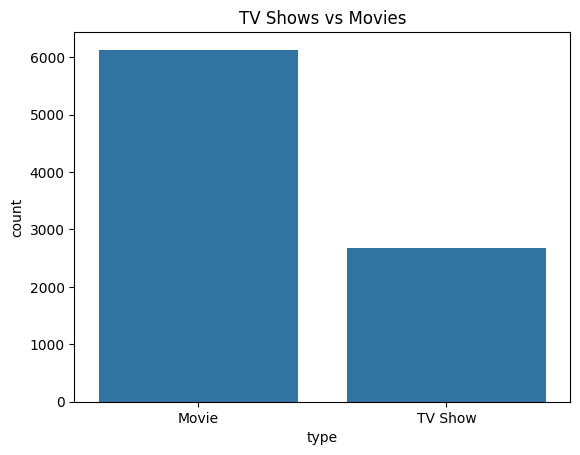

In [27]:

# STEP 6: TV vs Movie count
sns.countplot(data=df, x='type')
plt.title("TV Shows vs Movies")
plt.show()

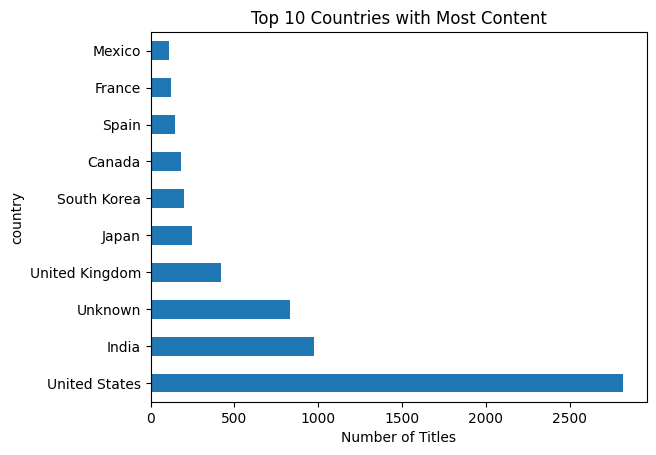

In [28]:
# STEP 7: Top 10 countries by content count
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='barh', title='Top 10 Countries with Most Content')
plt.xlabel("Number of Titles")
plt.show()


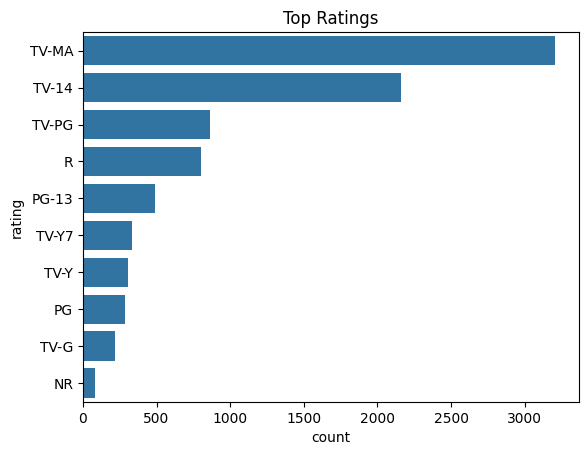

In [29]:
# STEP 8: Rating distribution
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index[:10])
plt.title("Top Ratings")
plt.show()


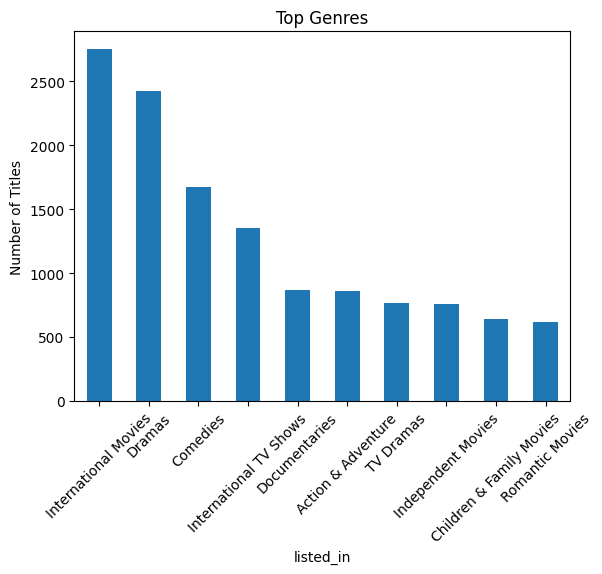

In [30]:
# STEP 9: Genre analysis
all_genres = df['listed_in'].str.split(', ').explode()
top_genres = all_genres.value_counts().head(10)
top_genres.plot(kind='bar', title='Top Genres')
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


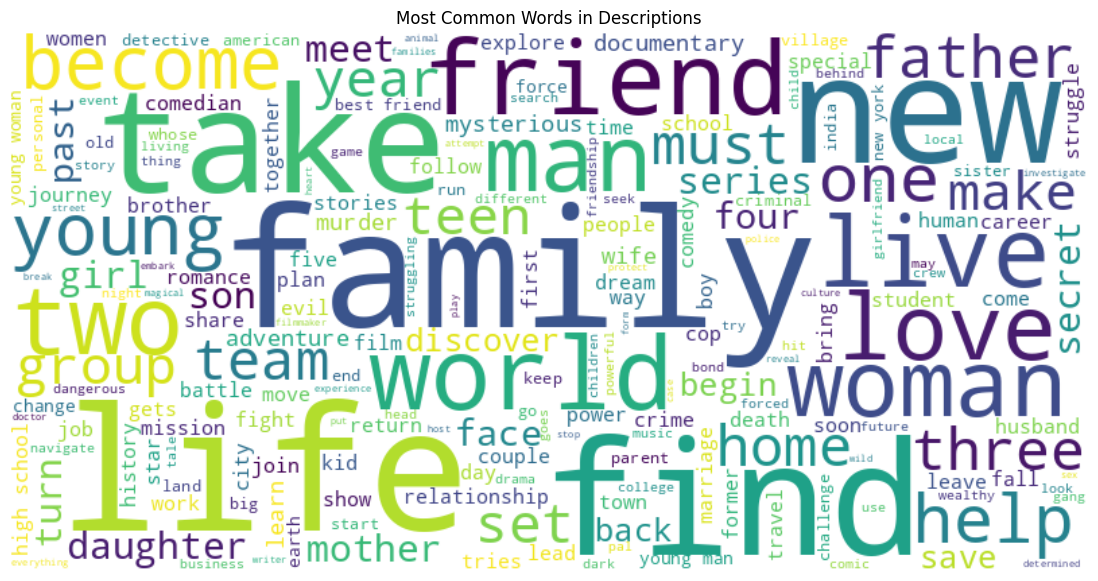

In [32]:
# STEP 10: Word Cloud from Descriptions
text = " ".join(df['description'].dropna())
stop_words = set(stopwords.words('english'))
# Download punkt_tab resource
nltk.download('punkt_tab')
filtered_words = " ".join([word for word in nltk.word_tokenize(text.lower()) if word.isalpha() and word not in stop_words])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_words)
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Descriptions")
plt.show()

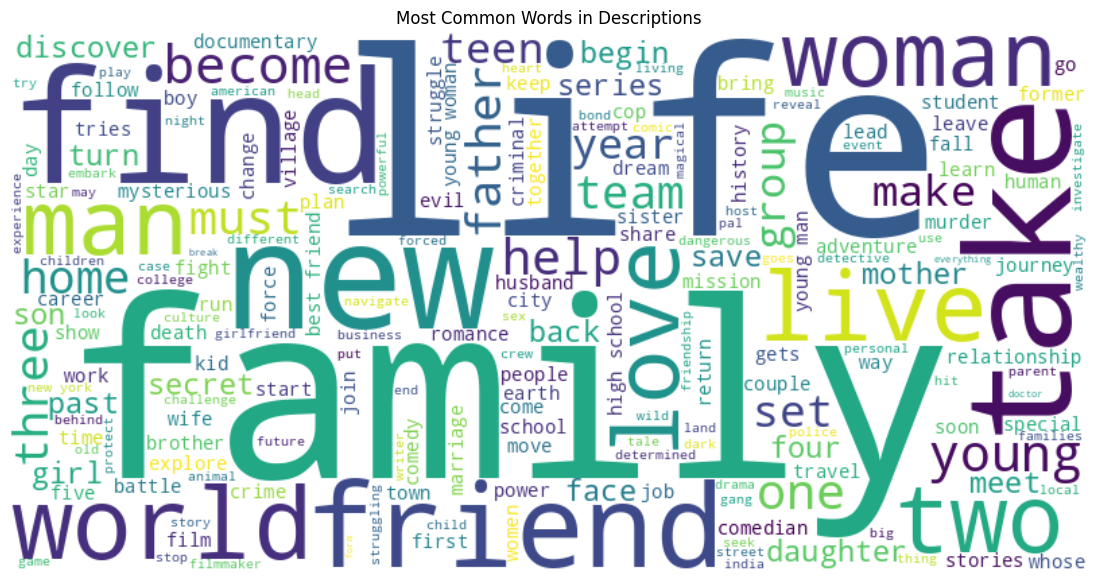

In [33]:
# STEP 10: Word Cloud from Descriptions
text = " ".join(df['description'].dropna())
stop_words = set(stopwords.words('english'))
filtered_words = " ".join([word for word in nltk.word_tokenize(text.lower()) if word.isalpha() and word not in stop_words])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_words)
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Descriptions")
plt.show()


In [35]:
# STEP 11: Predict Content Type Using Descriptions (Classification)
X = df['description']
y = df['type']

vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)

preds = model.predict(X_test)
print("\nClassification Report:\n")
print(classification_report(y_test, preds))



Classification Report:

              precision    recall  f1-score   support

       Movie       0.74      0.98      0.84      1214
     TV Show       0.82      0.22      0.35       548

    accuracy                           0.74      1762
   macro avg       0.78      0.60      0.60      1762
weighted avg       0.76      0.74      0.69      1762



In [37]:
 #STEP 12: Cluster Content Based on Description (Unsupervised Learning)
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_tfidf)
df['cluster'] = kmeans.labels_

print("\nCluster Sample Counts:")
print(df['cluster'].value_counts())

# Export clustered samples
for i in range(5):
    print(f"\nCluster {i} Samples:")
    print(df[df['cluster'] == i][['title', 'description']].head(3))


Cluster Sample Counts:
cluster
4    5864
2    1518
3     523
0     467
1     435
Name: count, dtype: int64

Cluster 0 Samples:
                              title  \
14  Crime Stories: India Detectives   
41                             Jaws   
42                           Jaws 2   

                                          description  
14  Cameras following Bengaluru police on the job ...  
41  When an insatiable great white shark terrorize...  
42  Four years after the last deadly shark attacks...  

Cluster 1 Samples:
                      title                                        description
4              Kota Factory  In a city of coaching centers known to train I...
34  Tayo and Little Wizards  Tayo speeds into an adventure when his friends...
37              Angry Birds  Birds Red, Chuck and their feathered friends h...

Cluster 2 Samples:
                   title                                        description
2              Ganglands  To protect his family from a powe